In [0]:
!wget https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-std-drug-effectiveness/effectiveness-of-std-drugs-cc3e4cc9/916e0d48-7-dataset.zip

--2020-04-29 10:20:02--  https://he-s3.s3.amazonaws.com/media/hackathon/hackerearth-machine-learning-challenge-std-drug-effectiveness/effectiveness-of-std-drugs-cc3e4cc9/916e0d48-7-dataset.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.32.104
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.32.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8715767 (8.3M) [application/zip]
Saving to: ‘916e0d48-7-dataset.zip’

916e0d48-7-dataset. 100%[===================>]   8.31M  18.7MB/s    in 0.4s    

2020-04-29 10:20:03 (18.7 MB/s) - ‘916e0d48-7-dataset.zip’ saved [8715767/8715767]



In [0]:
!unzip 916e0d48-7-dataset.zip

Archive:  916e0d48-7-dataset.zip
   creating: dataset/
  inflating: dataset/test.csv        
  inflating: dataset/train.csv       


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import regex as re
import warnings
import nltk
warnings.filterwarnings('ignore')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [0]:
train.head(5)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43,6.144782


In [0]:
test.head(5)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",3-Jul-14,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",18-Oct-16,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",13-Jan-15,44,Insomnia,2


In [0]:
# Some used imports
%matplotlib inline
import pandas as pd
import numpy as np
import os
import glob
import matplotlib as mpl

# Just making the plots look better
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['font.size'] = 12

In [0]:
doc=train

In [0]:
doc.shape

(32165, 8)

In [0]:
doc['words'] = doc.review_by_patient.str.strip().str.split('[\W_]+')
doc.head()

In [0]:
rows = list()
for row in doc[['patient_id', 'words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((r.patient_id, word))

words = pd.DataFrame(rows, columns=['patient_id', 'word'])
words.head(20)

KeyboardInterrupt: ignored

In [0]:
words = words[words.word.str.len() > 0]
words.head(20)

In [0]:
words['word'] = words.word.str.lower()
words.head(20)

In [0]:
counts = words.groupby('patient_id')\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts.head()

In [0]:
word_sum = counts.groupby(level=0)\
    .sum()\
    .rename(columns={'n_w': 'n_d'})
word_sum

In [0]:
tf = counts.join(word_sum)

tf['tf'] = tf.n_w/tf.n_d

tf.head()

In [0]:
c_d = words.patient_id.nunique()
c_d

32164

In [0]:
idf = words.groupby('word')\
    .patient_id\
    .nunique()\
    .to_frame()\
    .rename(columns={'patient_id':'i_d'})\
    .sort_values('i_d')
idf.head()

,i_d
word,
іt,1
paw,1
pavement,1
pausing,1
distorts,1


In [0]:
idf['idf'] = np.log(c_d/idf.i_d.values)

idf.head()

,i_d,idf
word,,
іt,1,10.378603
paw,1,10.378603
pavement,1,10.378603
pausing,1,10.378603
distorts,1,10.378603


In [0]:
tf_idf = tf.join(idf)

tf_idf.head()

n_w  n_d        tf    i_d       idf
patient_id word                                     
9          039     5   75  0.066667  20044  0.472918
           i       5   75  0.066667  28873  0.107941
           a       3   75  0.040000  23772  0.302339
           and     3   75  0.040000  27344  0.162351
           have    3   75  0.040000  18344  0.561545

In [0]:
tf_idf['tf_idf'] = tf_idf.tf * tf_idf.idf
tf_idf.head(100)

n_w  n_d        tf    i_d       idf    tf_idf
patient_id word                                                 
9          039       5   75  0.066667  20044  0.472918  0.031528
           i         5   75  0.066667  28873  0.107941  0.007196
           a         3   75  0.040000  23772  0.302339  0.012094
           and       3   75  0.040000  27344  0.162351  0.006494
           have      3   75  0.040000  18344  0.561545  0.022462
...                ...  ...       ...    ...       ...       ...
12         had       1  104  0.009615  14223  0.815987  0.007846
           hard      1  104  0.009615    978  3.493093  0.033587
           having    1  104  0.009615   3263  2.288201  0.022002
           insane    1  104  0.009615    145  5.401869  0.051941
           is        1  104  0.009615  14503  0.796492  0.007659

[100 rows x 6 columns]

In [0]:
g = tf_idf.groupby(level=0)\
    .mean()\
    .rename(columns={'n_w': 'word'})
g

,word,n_d,tf,i_d,idf,tf_idf
patient_id,,,,,,
9,1.363636,75.0,0.018182,7315.545455,2.618031,0.037531
12,1.350649,104.0,0.012987,7236.883117,2.628609,0.027870
42,1.404762,118.0,0.011905,6829.297619,2.521613,0.022878
44,1.630000,163.0,0.010000,5544.440000,3.145691,0.022812
45,1.104167,53.0,0.020833,6374.125000,2.905580,0.056037
...,...,...,...,...,...,...
232275,1.432990,139.0,0.010309,5853.278351,3.039165,0.025270
232282,1.489362,70.0,0.021277,7525.553191,2.446885,0.045035
232283,1.456790,118.0,0.012346,6424.592593,2.743792,0.026795


In [0]:
g['tf_idf'].head(16190)

patient_id
9         2.064223
12        2.145985
42        1.921732
44        2.281161
45        2.689760
            ...   
116450    2.529142
116451    2.039370
116464    2.325754
116466    1.977428
116495    3.913121
Name: tf_idf, Length: 16190, dtype: float64

In [0]:
submission = pd.DataFrame({
        "idf":g['idf'],
        "tf_idf":g['tf_idf'],
        "i_d":g['i_d'],
        "tf":g['tf'],
        "n_d":g['n_d'],
        "word":g['word']

    })
submission.to_csv('./train_review_mean.csv', index=False)
print(submission)

                 idf    tf_idf          i_d        tf    n_d      word
patient_id                                                            
9           2.618031  0.037531  7315.545455  0.018182   75.0  1.363636
12          2.628609  0.027870  7236.883117  0.012987  104.0  1.350649
42          2.521613  0.022878  6829.297619  0.011905  118.0  1.404762
44          3.145691  0.022812  5544.440000  0.010000  163.0  1.630000
45          2.905580  0.056037  6374.125000  0.020833   53.0  1.104167
...              ...       ...          ...       ...    ...       ...
232275      3.039165  0.025270  5853.278351  0.010309  139.0  1.432990
232282      2.446885  0.045035  7525.553191  0.021277   70.0  1.489362
232283      2.743792  0.026795  6424.592593  0.012346  118.0  1.456790
232286      2.685409  0.051392  8072.568182  0.022727   54.0  1.227273
232289      3.542903  0.062019  5683.916667  0.020833   79.0  1.645833

[32164 rows x 6 columns]


In [0]:
from google.colab import files
files.download('train_review_mean.csv')

In [0]:
train.isnull().sum(),test.isnull().sum()

(patient_id                    0
 name_of_drug                  0
 use_case_for_drug             0
 review_by_patient             0
 effectiveness_rating          0
 drug_approved_by_UIC          0
 number_of_times_prescribed    0
 base_score                    0
 dtype: int64, patient_id                    0
 name_of_drug                  0
 review_by_patient             0
 drug_approved_by_UIC          0
 number_of_times_prescribed    0
 use_case_for_drug             0
 effectiveness_rating          0
 dtype: int64)

In [0]:
train['drug_approved_by_UIC'].nunique()

3537

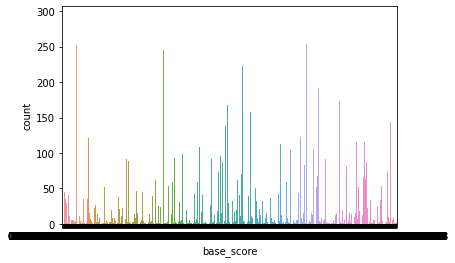

In [0]:
import seaborn as sns
sns.countplot(x='base_score', data=train)

In [0]:
loc = np.append(train['name_of_drug'].values, test['name_of_drug'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['name_of_drug']=l.transform(train['name_of_drug'])
test['name_of_drug']=l.transform(test['name_of_drug'])

In [0]:
loc = np.append(train['use_case_for_drug'].values, test['use_case_for_drug'].values, axis=0)
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
l.fit(list(set(loc)))
train['use_case_for_drug']=l.transform(train['use_case_for_drug'])
test['use_case_for_drug']=l.transform(test['use_case_for_drug'])

In [0]:
train['drug_approved_by_UIC'] = pd.to_datetime(train['drug_approved_by_UIC'])
test['drug_approved_by_UIC'] = pd.to_datetime(test['drug_approved_by_UIC'])

In [0]:
train['year'] = train['drug_approved_by_UIC'].dt.year
train['day'] = train['drug_approved_by_UIC'].dt.day
train['month'] = train['drug_approved_by_UIC'].dt.month
test['year'] = test['drug_approved_by_UIC'].dt.year
test['day'] = test['drug_approved_by_UIC'].dt.day
test['month'] = test['drug_approved_by_UIC'].dt.month

In [0]:
del train['drug_approved_by_UIC']
del test['drug_approved_by_UIC']

In [0]:
del train['review_by_patient']
del test['review_by_patient']

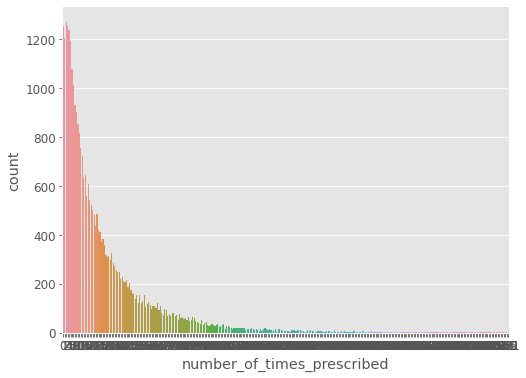

In [0]:
sns.countplot(x='number_of_times_prescribed', data=train)

In [0]:
from google.colab import files
files.upload()

In [0]:

#Best Library for Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import os

%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 8]
plt.style.use("fivethirtyeight")

import warnings
warnings.simplefilter('ignore')

pd.options.display.max_rows = 500
pd.options.display.max_columns = 500
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, TimeSeriesSplit
from sklearn.metrics import make_scorer, mean_squared_error

# Regression
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet, Lasso
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor

import xgboost as xgb
!pip install catboost
import lightgbm as lgb
import catboost as cat


     |████████████████████████████████| 64.8MB 95kB/s 


In [0]:
delete = ['review_by_patient','patient_id','name_of_drug','drug_approved_by_UIC','use_case_for_drug']
dataset = [train,test]
for x in dataset:
    for i in delete:
        del x[i]

In [0]:
train.head(2)

,effectiveness_rating,number_of_times_prescribed,base_score
0,9,27,8.022969
1,8,192,7.858458


In [0]:
test.head(2)

,number_of_times_prescribed,effectiveness_rating
0,22,10
1,35,9


In [0]:
trainX, validX = train_test_split(train, test_size=0.2, shuffle=False, random_state=13)
print("Train Shape : {}\nValid Shape : {}".format(trainX.shape, validX.shape))

Train Shape : (25732, 3)
Valid Shape : (6433, 3)


In [0]:
def metric(y,y0):
    assert len(y)==len(y0)
    return 100-np.sqrt(np.mean(np.power(np.log1p(y)-np.log1p(y0),2)))

def metric_lgb(y_pred,data):
    y_true = data.get_label()
    result = metric(y_true,y_pred)
    
    return '100-rmse', result,True

In [0]:

def baseliner(train, features, target, cv=3, metric=make_scorer(metric, True)):
    print("Baseliner Models(All)")
    eval_dict = {}
    models = [
#         KNeighborsRegressor(), GaussianNB(), 
        lgb.LGBMRegressor(), ExtraTreesRegressor(), xgb.XGBRegressor(objective='reg:squarederror'), 
        cat.CatBoostRegressor(verbose=0), GradientBoostingRegressor(), RandomForestRegressor(), 
        LinearRegression(), DecisionTreeRegressor(), ExtraTreeRegressor(), AdaBoostRegressor(), 
        BaggingRegressor(), ElasticNet(), Lasso(), Ridge(), 
        ] #SVR(), 

    print("sklearn Model Name  \t  CV")
    print("--" * 50)

    for index, model in enumerate(models, 0):
        model_name = str(model).split("(")[0]
        eval_dict[model_name] = {}

        results = cross_val_score(model, train[features], train[target], cv=cv, scoring=metric)
        eval_dict[model_name]['cv'] = results.mean()

        print("%s \t %.4f \t" % (
            model_name[:21], eval_dict[model_name]['cv']))

In [0]:

tscv = TimeSeriesSplit(n_splits=3)
target = 'base_score'

In [0]:
feat = train.columns.to_list()
feat.remove(target)

In [0]:
baseliner(train,feat,target,cv=tscv,metric=make_scorer(metric,True))

Baseliner Models(All)
sklearn Model Name  	  CV
----------------------------------------------------------------------------------------------------
LGBMRegressor 	 99.9584 	
ExtraTreesRegressor 	 99.9695 	
XGBRegressor 	 99.9029 	
<catboost.core.CatBoo 	 99.9670 	
GradientBoostingRegre 	 99.9024 	
RandomForestRegressor 	 99.9697 	
LinearRegression 	 99.7648 	
DecisionTreeRegressor 	 99.9685 	
ExtraTreeRegressor 	 99.9606 	
AdaBoostRegressor 	 99.8205 	
BaggingRegressor 	 99.9686 	
ElasticNet 	 99.7628 	
Lasso 	 99.7597 	
Ridge 	 99.7648 	


In [0]:
def lgb_model(train, features, target, ts=False, plot=True):
    evals_result = {}
    trainX, validX, trainY, validY = train_test_split(train[features], train[target], shuffle=False, test_size=0.2, random_state=101)
    print("LGB Model")
    lgb_train_set = lgb.Dataset(trainX, label=trainY)
    lgb_valid_set = lgb.Dataset(validX, label=validY)

    MAX_ROUNDS = 1200
    
    lgb_params = {
        
        "boosting": 'gbdt',
        "learning_rate": 0.1,
        "nthread": -1,
        "seed": 13,
        "num_boost_round": MAX_ROUNDS,
        "objective": "regression",
    }

    lgb_model = lgb.train(
        lgb_params,
        train_set=lgb_train_set,
        valid_sets=[lgb_train_set, lgb_valid_set],
        early_stopping_rounds=50,
        verbose_eval=100,
        evals_result=evals_result,
        feval=metric_lgb # New metric to be optimised
    )
    if plot:
        lgb.plot_importance(lgb_model, figsize=(12, 12))
        lgb.plot_metric(evals_result, metric='100-rmse')

    return lgb_model, lgb_model.best_score

LGB Model
Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 0.0334862	training's 100-rmse: 99.9662	valid_1's l2: 0.0353528	valid_1's 100-rmse: 99.9654
[200]	training's l2: 0.0130876	training's 100-rmse: 99.977	valid_1's l2: 0.0169291	valid_1's 100-rmse: 99.975
[300]	training's l2: 0.00903045	training's 100-rmse: 99.9805	valid_1's l2: 0.0129938	valid_1's 100-rmse: 99.9783
[400]	training's l2: 0.00695898	training's 100-rmse: 99.9829	valid_1's l2: 0.0110818	valid_1's 100-rmse: 99.9805
[500]	training's l2: 0.00557888	training's 100-rmse: 99.9847	valid_1's l2: 0.00991008	valid_1's 100-rmse: 99.9818
[600]	training's l2: 0.00477468	training's 100-rmse: 99.9859	valid_1's l2: 0.00927728	valid_1's 100-rmse: 99.9827
[700]	training's l2: 0.00428699	training's 100-rmse: 99.9866	valid_1's l2: 0.00891812	valid_1's 100-rmse: 99.9831
[800]	training's l2: 0.00392588	training's 100-rmse: 99.9872	valid_1's l2: 0.00867264	valid_1's 100-rmse: 99.9835
[900]	training's l2: 0.0

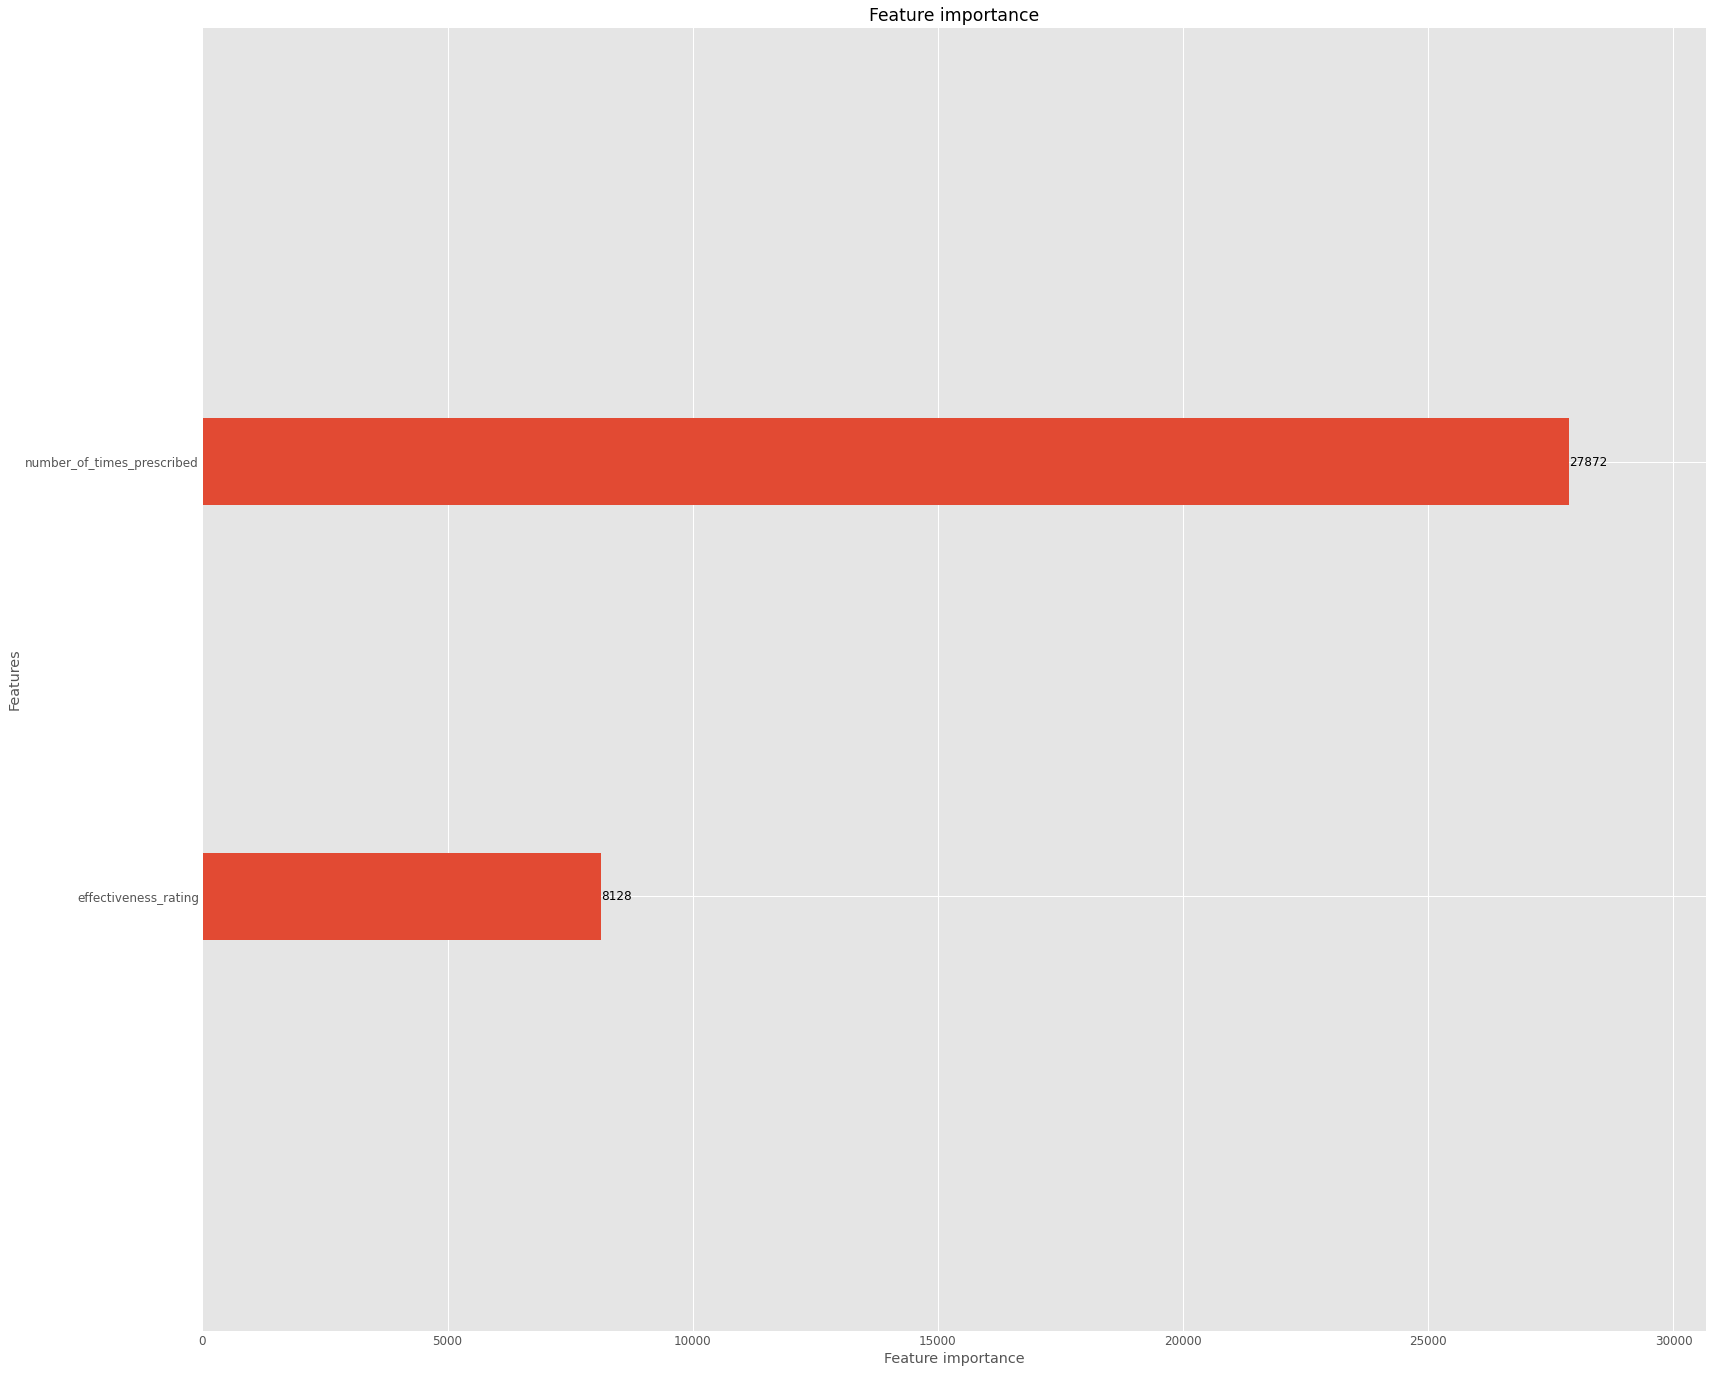

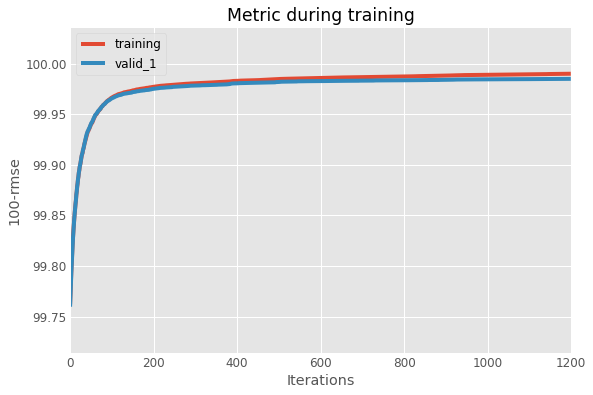

In [0]:
lgbM, score = lgb_model(train,feat,target,True,True)

In [0]:
lgbtrain = lgb.Dataset(train[feat],label = train[target])

In [0]:
MAX_ROUNDS = 1200
    
lgb_params = {
        
        "boosting": 'gbdt',
        "learning_rate": 0.2,
        "nthread": -1,
        "seed": 13,
        "num_boost_round": MAX_ROUNDS,
        "objective": "regression",
    }

In [0]:

lgb_model = lgb.train(
    lgb_params,
    train_set=lgbtrain,
    verbose_eval=100,
    feval=metric_lgb, # New metric to be optimised
)

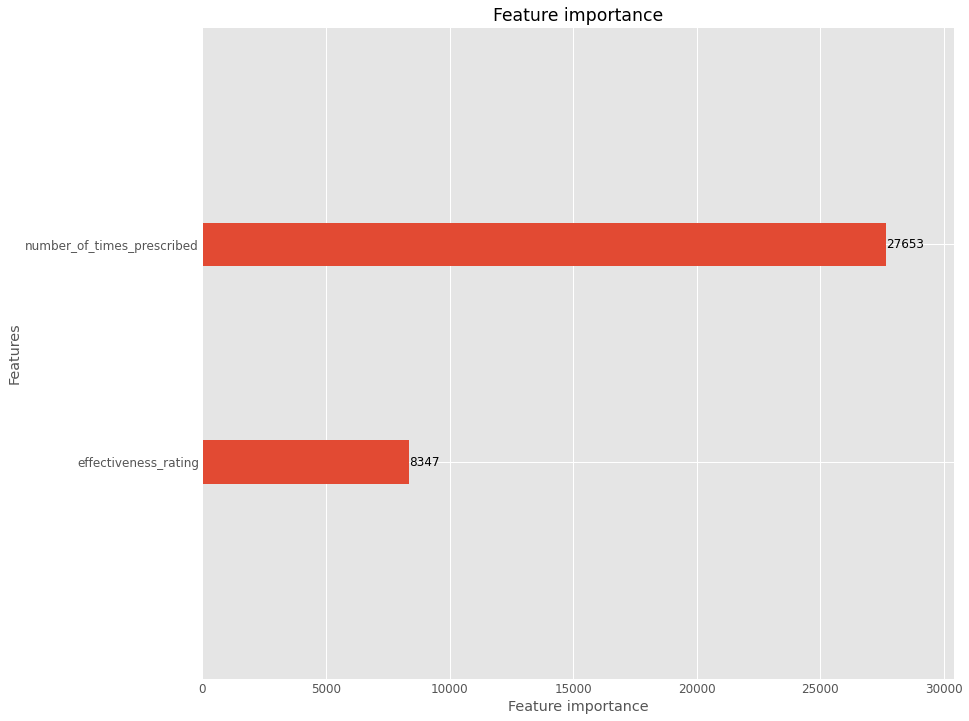

In [0]:

lgb.plot_importance(lgb_model, figsize=(12, 12))

In [0]:
y_preds = lgb_model.predict(test[feat])
test[target] = y_preds
test[target].head()


0    8.756566
1    8.744185
2    5.945538
3    5.993944
4    5.280191
Name: base_score, dtype: float64

In [0]:
ans = []
for i in range(len(y_preds)):
    ans.append(round(y_preds[i],2))

In [0]:
sub = ans
sub = pd.DataFrame(sub)
sub['base_score'] = ans

In [0]:
from google.colab import files
files.download('sub.csv')